In [38]:
library(tidyverse)
library(tidymodels)

In [50]:
#Reading data into Jupyter
heart_disease <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)
colnames(heart_disease) <- c("age", "sex", "chest_pain_type", "resting_blood_pressure", "chol", "fasting_blood_sugar", "resting_electrocardiographic_results", "maximum_heart_rate_achieved", "exercise_induced_angina", "ST_level", "slope", "number_of_major_vessels", "thal", "diagnosis_of_heart_disease")
heart_data <- heart_disease |> mutate(diagnosis = as_factor(diagnosis_of_heart_disease)) |> select(age, resting_blood_pressure, chol, ST_level, diagnosis)
heart_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,resting_blood_pressure,chol,ST_level,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,2.3,0
67,160,286,1.5,2
67,120,229,2.6,1
37,130,250,3.5,0
41,130,204,1.4,0
56,120,236,0.8,0
62,140,268,3.6,3
57,120,354,0.6,0
63,130,254,1.4,2


In [51]:
#clean the data first
#since values 1-4 indicate presence of heart disease, we can assign all these values as "1"
heart_data["diagnosis"][heart_data["diagnosis"] == "2"] <- "1"
heart_data["diagnosis"][heart_data["diagnosis"] == "3"] <- "1"
heart_data["diagnosis"][heart_data["diagnosis"] == "4"] <- "1"

In [52]:
#now let's split it into training and testing data
heart_split <- initial_split(heart_data, prop = 0.75, strata = diagnosis)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)
#do we want 75:25? or another split? ASK

Then, we need to SUMMARIZE (group and summarize?) our data in one table. An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

In [53]:
#Now we can summarize our data; let's find the number of observations for each class (heart disease = 1 or no heart disease = 0)
heart_summary <- heart_train |> group_by(diagnosis) |> summarize(number_of_observations = n(), average_bp = mean(resting_blood_pressure), average_chol = mean(chol), mean_st = mean(ST_level))
heart_summary
#the number of observations in each class is roughly equal

diagnosis,number_of_observations,average_bp,average_chol,mean_st
<fct>,<int>,<dbl>,<dbl>,<dbl>
0,123,128.7561,240.9919,0.6162602
1,104,134.5962,250.6154,1.6500000


In [54]:
Now we can graph to show the distribution of our predictors (show that it is possible to classify using them)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: Now we
        ^


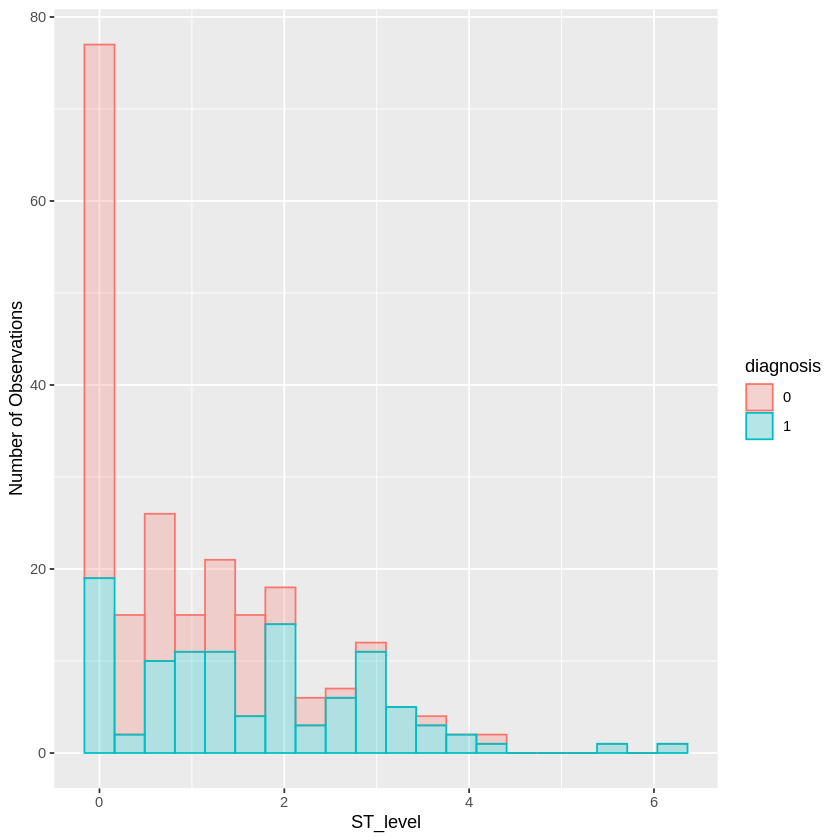

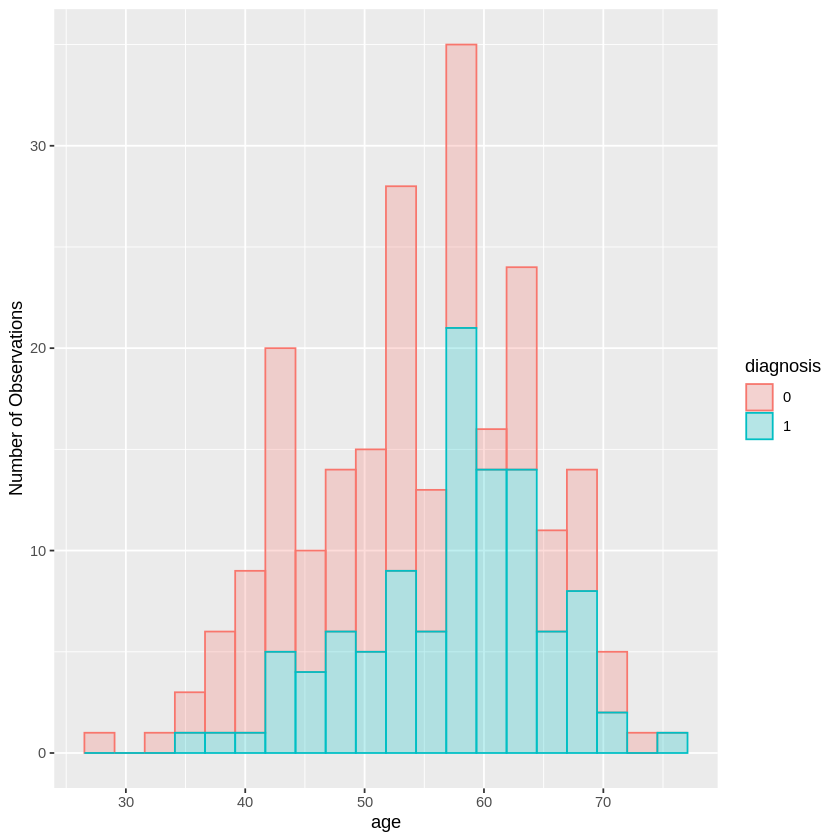

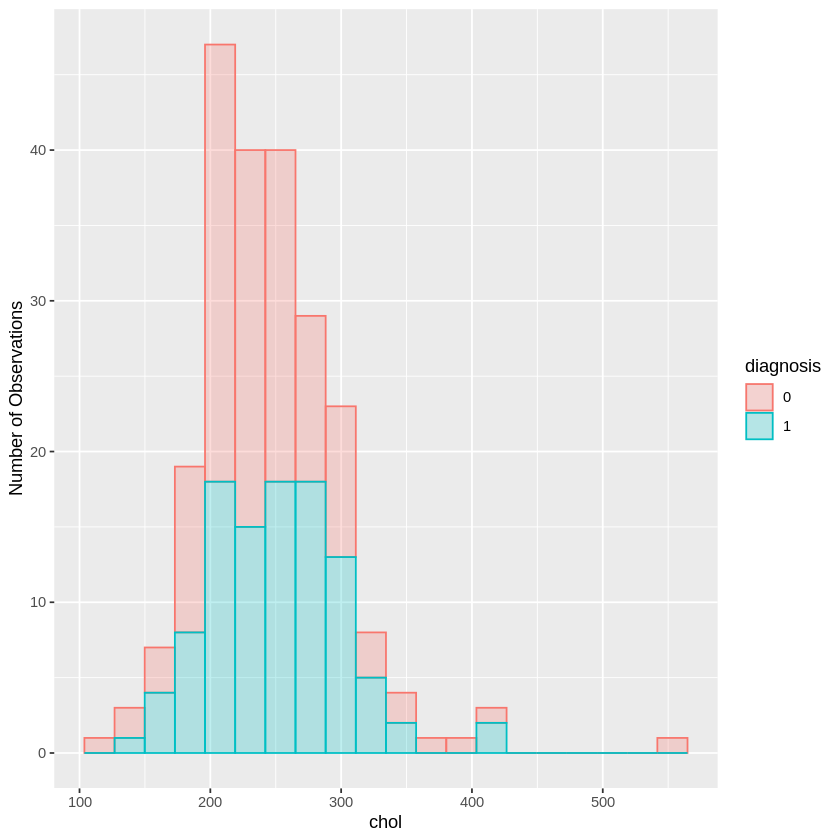

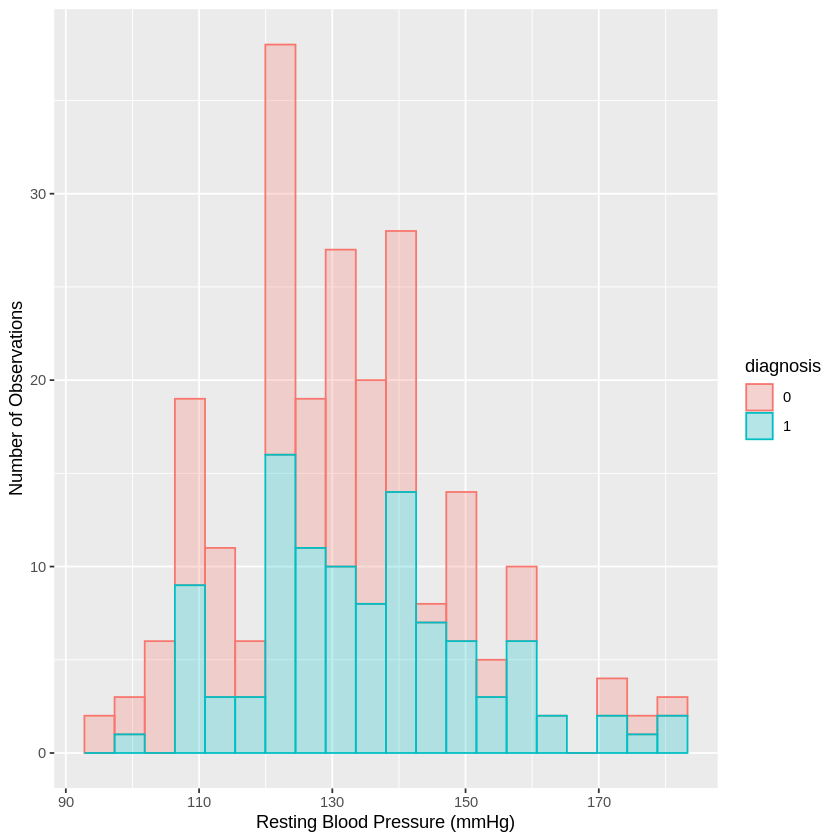

In [59]:
#let's find distributions of values
bp_distribution <- ggplot(heart_train, aes(x = resting_blood_pressure, fill = diagnosis, colour = diagnosis)) + geom_histogram(bins = 20,alpha = 0.25) + labs(x = "Resting Blood Pressure (mmHg)", y = "Number of Observations")
                     
chol_distribution <- ggplot(heart_train, aes(x = chol, fill = diagnosis, colour = diagnosis)) + geom_histogram(bins = 20, alpha = 0.25) + labs("Serum Cholestoral (mg/dl)", y = "Number of Observations")

age_distribution <- ggplot(heart_train, aes(x = age, fill = diagnosis, colour = diagnosis)) + geom_histogram(bins = 20,alpha = 0.25) + labs("Age", y = "Number of Observations")

st_distribution <- ggplot(heart_train, aes(x = ST_level, fill = diagnosis, colour = diagnosis)) + geom_histogram(bins = 20, alpha = 0.25) + labs("ST Level", y = "Number of Observations")

st_distribution
age_distribution
chol_distribution
bp_distribution